In [1]:
import random
import numpy as np
from numpy import ogrid
from numpy.linalg import eig
import matplotlib.pyplot as plt
import cmath
# Enable interactive plot
%matplotlib notebook
from tabulate import tabulate
import matplotlib.animation as anim


#plt.style.use('seaborn')

In [2]:
from matplotlib import rc

rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Palatino']})

color1 = ['#ff595e','#ffca3a','#8ac926','#1982c4','#6a4c93']
color = ['#83b692','#f9ada0', '#f9627d', '#c65b7c', '#5b3758']

In [3]:
r_n = np.linspace(-1.5,1.5,32)  # grid pf 32 points

In [4]:
pred = np.load('./ModelLSTM/prediccion.npy')
sal = np.load('./ModelLSTM/salida.npy')
potential = np.load('./ModelLSTM/potencial.npy')

In [5]:
batch = 2  # because there are 10 arrays

In [6]:
#time = 30
pred_dens = ((np.abs(np.vectorize(complex)(pred[batch,:,0:32],pred[batch,:,32:64])))**2)*10 #density times 10
sal_dens = ((np.abs(np.vectorize(complex)(sal[batch,:,0:32],sal[batch,:,32:64])))**2)*10  # density times 10
pote = potential[batch,:,:]*(1/1.5936e-3)  # au to kcal/mol

<IPython.core.display.Javascript object>


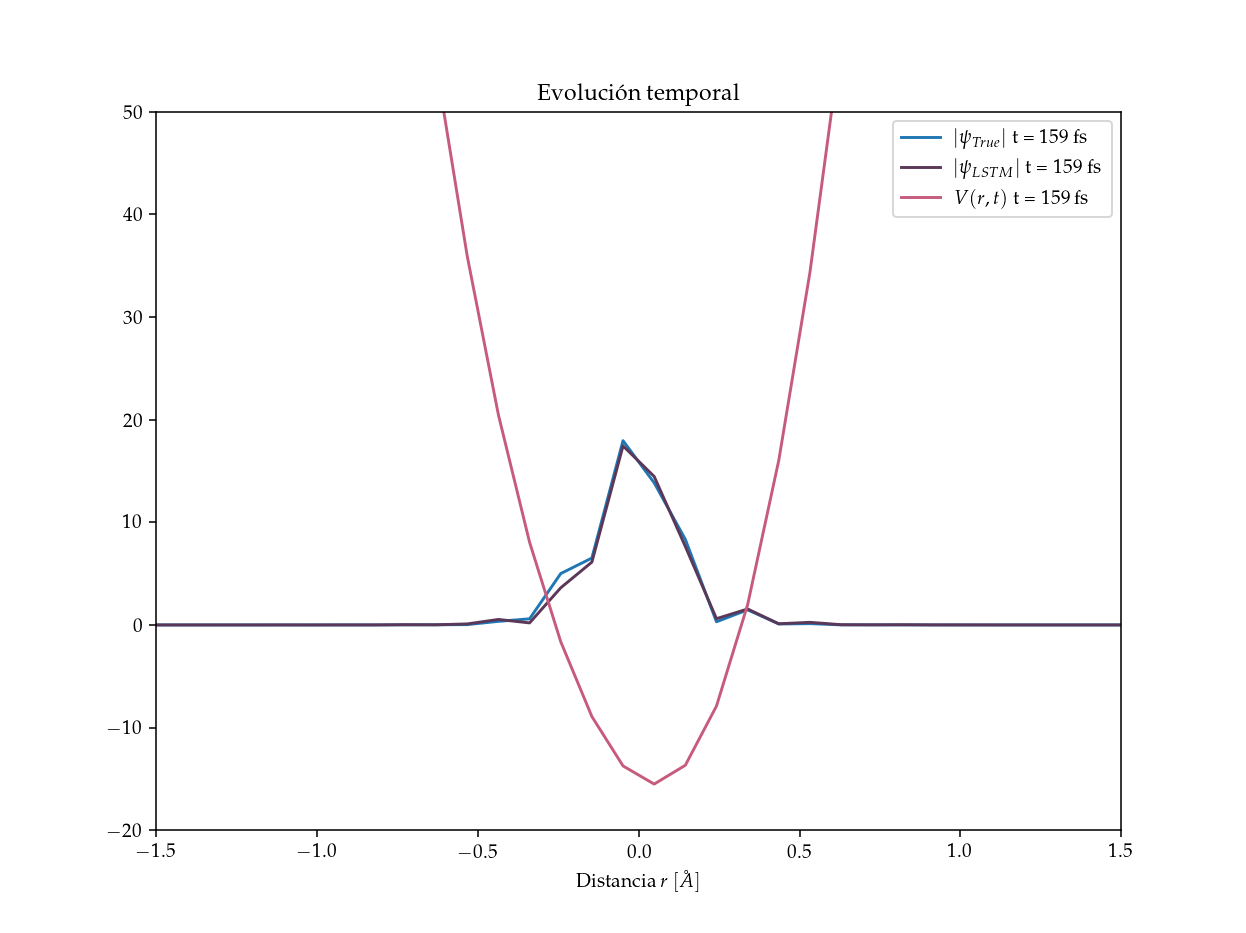

In [8]:
x = []  # real part 
y = []

x1 = []  # imag part
y1 = []

x2 = []  # density true
y2 = []

x3 = []
y3 = []


fig, ax = plt.subplots()

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-20,50])
ax.set_xlabel('Distancia $r$ $[\AA]$')
ax.set_title(r"Evolución temporal")






#lwaver,  = ax.plot(x, y, "-", color = "green")
#lwavei,  = ax.plot(x2, y2, "-", color = "blue")

dens_t, = ax.plot(x3, y3, "-")
dens_lstm, = ax.plot(x2, y2, "-", color = color[4])
potent, = ax.plot(x1, y1, "-", color = color[3])

def shift(frame):
    '''
    lwaver.set_xdata(r_n)
    lwaver.set_ydata((onda[:,frame].real))
    lwaver.set_label('$\Psi(r,t)*10$_real t = '+str(frame)+' fs')
           
    lwavei.set_xdata(r_n)
    lwavei.set_ydata((onda[:,frame].imag))
    lwavei.set_label('$\Psi(r,t)*10$_imag t = '+str(frame)+' fs')
    '''
    potent.set_xdata(r_n)
    potent.set_ydata(pote[frame,:])
    potent.set_label('$V(r,t)$ t = '+str(frame)+' fs')
    
                  
    dens_t.set_xdata(r_n)
    dens_t.set_ydata(sal_dens[frame,:])
    dens_t.set_label('$|\psi_{True}|$ t = '+str(frame)+' fs')
    
    dens_lstm.set_xdata(r_n)
    dens_lstm.set_ydata(pred_dens[frame,:])
    dens_lstm.set_label('$|\psi_{LSTM}|$ t = '+str(frame)+' fs')
    
    ax.legend()
    
    #return (lwaver, lwavei, potent, dens,)
    return (dens_t, potent,)

ani = anim.FuncAnimation(fig, shift, frames = 200, blit = False)

# to save gif
f = r"./animationLSTM-dens&pot.gif" 
writergif = anim.PillowWriter(fps=80)
ani.save(f, writer=writergif)






